<a href="https://colab.research.google.com/github/Nazar-Popovych/Personal/blob/main/Nazar_Popovych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [303]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/Nazar-Popovych/Personal/refs/heads/main/employees.csv")

display(df)

,Employee ID,First Name,Last Name,Age,Gender,DOB,Date Joined,Date Resigned,Department,Salary,Performance level
0,1,Cynthia,gomez,48.0,Woman,08 May 2010,2021-12-15,2024-05-21,Operation,184016,1
1,2,Ryan,Blair,NaN,Man,1908-07-02,2024-07-14,2028-06-26,Sales,101159,Exceeds
2,3,John,Russo,69.0,F,12 Sep 2021,2023-11-02,2027-06-29,Marketing,52625,Outstanding
3,4,Donald,Salinas,52.0,Girl,2016-12-12,2023-10-30,2026-10-20,Sales,90758,Meets
4,5,James,Lee,70.0,Woman,08 Aug 2011,2022-12-21,2025-08-21,IT,193481,3
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Heather,Salazar,66.0,Boy,NaN,2022-03-15,2024-04-24,IT,108230,Outstanding
996,997,Matthew,lowery,48.0,NaN,24 Apr 1972,2024-12-04,2027-03-03,Finance,5777,3
997,998,Martin Danny,NaN,63.0,Man,1951-05-21,2020-08-13,2023-09-28,IT,110772,Needs Improvement
998,999,Shelby,Mata,19.0,Man,1985-11-23,2020-08-05,2023-09-24,IT,164747,4


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee ID        1000 non-null   int64  
 1   First Name         947 non-null    object 
 2   Last Name          963 non-null    object 
 3   Age                891 non-null    float64
 4   Gender             902 non-null    object 
 5   DOB                888 non-null    object 
 6   Date Joined        1000 non-null   object 
 7   Date Resigned      1000 non-null   object 
 8   Department         1000 non-null   object 
 9   Salary             1000 non-null   int64  
 10  Performance level  1000 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 86.1+ KB


In [305]:
missing_values_count = df.isnull().sum()

missing_values_count[0:100000]

,0
Employee ID,0
First Name,53
Last Name,37
Age,109
Gender,98
DOB,112
Date Joined,0
Date Resigned,0
Department,0
Salary,0


In [306]:
df = df.dropna(subset=['First Name'])
df = df.dropna(subset=['Last Name'])
df = df.dropna(subset=['Gender'])
df = df.dropna(subset=['DOB'])

In [307]:
mean=df[df['Age']!=0]['Age'].mean()

In [308]:
def changeToMean(row):

    if pd.isna(row['Age']) or row['Age'] == 0:
        row['Age'] = mean

    return row

df=df.apply(changeToMean, axis=1)

In [309]:
missing_values_count = df.isnull().sum()

missing_values_count[0:100000]

,0
Employee ID,0
First Name,0
Last Name,0
Age,0
Gender,0
DOB,0
Date Joined,0
Date Resigned,0
Department,0
Salary,0


In [310]:
display(df)

,Employee ID,First Name,Last Name,Age,Gender,DOB,Date Joined,Date Resigned,Department,Salary,Performance level
0,1,Cynthia,gomez,48.0000,Woman,08 May 2010,2021-12-15,2024-05-21,Operation,184016,1
1,2,Ryan,Blair,43.8151,Man,1908-07-02,2024-07-14,2028-06-26,Sales,101159,Exceeds
2,3,John,Russo,69.0000,F,12 Sep 2021,2023-11-02,2027-06-29,Marketing,52625,Outstanding
3,4,Donald,Salinas,52.0000,Girl,2016-12-12,2023-10-30,2026-10-20,Sales,90758,Meets
4,5,James,Lee,70.0000,Woman,08 Aug 2011,2022-12-21,2025-08-21,IT,193481,3
...,...,...,...,...,...,...,...,...,...,...,...
992,993,Alan,Dunn,45.0000,F,10 Nov 2022,2023-05-24,2024-07-30,Sales,133615,Exceeds
993,994,Ralph,Perry,44.0000,Male,1953-11-01,2024-11-10,2024-12-13,Customer Service,158779,1
994,995,Jim,Mendoza,30.0000,Woman,1939-12-20,2023-05-25,2023-10-13,Financ,32691,1
998,999,Shelby,Mata,19.0000,Man,1985-11-23,2020-08-05,2023-09-24,IT,164747,4


In [311]:
def unify_gender(row):
    gender = row['Gender']

    if gender in ['Woman', 'Girl']:
        row['Gender'] = 'Female'
    elif gender in ['Man', 'Boy']:
        row['Gender'] = 'Male'

    return row

df = df.apply(unify_gender, axis=1)

df = df[df['Gender'].isin(['Male', 'Female'])]


In [312]:
display(df)

,Employee ID,First Name,Last Name,Age,Gender,DOB,Date Joined,Date Resigned,Department,Salary,Performance level
0,1,Cynthia,gomez,48.0000,Female,08 May 2010,2021-12-15,2024-05-21,Operation,184016,1
1,2,Ryan,Blair,43.8151,Male,1908-07-02,2024-07-14,2028-06-26,Sales,101159,Exceeds
3,4,Donald,Salinas,52.0000,Female,2016-12-12,2023-10-30,2026-10-20,Sales,90758,Meets
4,5,James,Lee,70.0000,Female,08 Aug 2011,2022-12-21,2025-08-21,IT,193481,3
6,7,Theresa,morgan,46.0000,Male,1967-02-19,2024-02-18,2024-12-11,Sale,3449,Exceeds
...,...,...,...,...,...,...,...,...,...,...,...
991,992,Henry,Berry,52.0000,Female,1960-08-16,2024-11-07,2027-09-04,IT,42710,Needs Improvement
993,994,Ralph,Perry,44.0000,Male,1953-11-01,2024-11-10,2024-12-13,Customer Service,158779,1
994,995,Jim,Mendoza,30.0000,Female,1939-12-20,2023-05-25,2023-10-13,Financ,32691,1
998,999,Shelby,Mata,19.0000,Male,1985-11-23,2020-08-05,2023-09-24,IT,164747,4


In [313]:
df['First Name'] = df['First Name'].str.title()
df['Last Name'] = df['Last Name'].str.title()

In [314]:
display(df)

,Employee ID,First Name,Last Name,Age,Gender,DOB,Date Joined,Date Resigned,Department,Salary,Performance level
0,1,Cynthia,Gomez,48.0000,Female,08 May 2010,2021-12-15,2024-05-21,Operation,184016,1
1,2,Ryan,Blair,43.8151,Male,1908-07-02,2024-07-14,2028-06-26,Sales,101159,Exceeds
3,4,Donald,Salinas,52.0000,Female,2016-12-12,2023-10-30,2026-10-20,Sales,90758,Meets
4,5,James,Lee,70.0000,Female,08 Aug 2011,2022-12-21,2025-08-21,IT,193481,3
6,7,Theresa,Morgan,46.0000,Male,1967-02-19,2024-02-18,2024-12-11,Sale,3449,Exceeds
...,...,...,...,...,...,...,...,...,...,...,...
991,992,Henry,Berry,52.0000,Female,1960-08-16,2024-11-07,2027-09-04,IT,42710,Needs Improvement
993,994,Ralph,Perry,44.0000,Male,1953-11-01,2024-11-10,2024-12-13,Customer Service,158779,1
994,995,Jim,Mendoza,30.0000,Female,1939-12-20,2023-05-25,2023-10-13,Financ,32691,1
998,999,Shelby,Mata,19.0000,Male,1985-11-23,2020-08-05,2023-09-24,IT,164747,4


In [315]:
df['Performance level'].unique()

array(['1', 'Exceeds', 'Meets', '3', '2', 'Below', 'Needs Improvement',
       '4', 'Outstanding', '5'], dtype=object)

In [316]:
df['Department'].unique()

array(['Operation', 'Sales', 'IT', 'Sale', 'Operations',
       'Customer Service', 'Marketing', 'Engineering', 'Finance', 'H',
       'HR', 'I', 'Customer Servic', 'Financ', 'engineeringing',
       'marketinging'], dtype=object)

In [317]:
performance = {
    'Outstanding': 5,
    'Exceeds': 4,
    'Meets': 3,
    'Needs Improvement': 2,
    'Below': 1
}

df['Performance level'] = df['Performance level'].replace(performance)

In [318]:
department = {
    'I': 'IT',
    'H': 'HR',
    'Operation': 'Operations',
    'Sale': 'Sales',
    'Customer Servic': 'Customer Service',
    'Financ': 'Finance',
    'marketinging': 'Marketing',
    'engineeringing': 'Engineering'
}

df['Department'] = df['Department'].replace(department)

In [319]:
display(df)

,Employee ID,First Name,Last Name,Age,Gender,DOB,Date Joined,Date Resigned,Department,Salary,Performance level
0,1,Cynthia,Gomez,48.0000,Female,08 May 2010,2021-12-15,2024-05-21,Operations,184016,1
1,2,Ryan,Blair,43.8151,Male,1908-07-02,2024-07-14,2028-06-26,Sales,101159,4
3,4,Donald,Salinas,52.0000,Female,2016-12-12,2023-10-30,2026-10-20,Sales,90758,3
4,5,James,Lee,70.0000,Female,08 Aug 2011,2022-12-21,2025-08-21,IT,193481,3
6,7,Theresa,Morgan,46.0000,Male,1967-02-19,2024-02-18,2024-12-11,Sales,3449,4
...,...,...,...,...,...,...,...,...,...,...,...
991,992,Henry,Berry,52.0000,Female,1960-08-16,2024-11-07,2027-09-04,IT,42710,2
993,994,Ralph,Perry,44.0000,Male,1953-11-01,2024-11-10,2024-12-13,Customer Service,158779,1
994,995,Jim,Mendoza,30.0000,Female,1939-12-20,2023-05-25,2023-10-13,Finance,32691,1
998,999,Shelby,Mata,19.0000,Male,1985-11-23,2020-08-05,2023-09-24,IT,164747,4


In [320]:
df['Age'] = df['Age'].astype(int)

In [321]:
display(df)

,Employee ID,First Name,Last Name,Age,Gender,DOB,Date Joined,Date Resigned,Department,Salary,Performance level
0,1,Cynthia,Gomez,48,Female,08 May 2010,2021-12-15,2024-05-21,Operations,184016,1
1,2,Ryan,Blair,43,Male,1908-07-02,2024-07-14,2028-06-26,Sales,101159,4
3,4,Donald,Salinas,52,Female,2016-12-12,2023-10-30,2026-10-20,Sales,90758,3
4,5,James,Lee,70,Female,08 Aug 2011,2022-12-21,2025-08-21,IT,193481,3
6,7,Theresa,Morgan,46,Male,1967-02-19,2024-02-18,2024-12-11,Sales,3449,4
...,...,...,...,...,...,...,...,...,...,...,...
991,992,Henry,Berry,52,Female,1960-08-16,2024-11-07,2027-09-04,IT,42710,2
993,994,Ralph,Perry,44,Male,1953-11-01,2024-11-10,2024-12-13,Customer Service,158779,1
994,995,Jim,Mendoza,30,Female,1939-12-20,2023-05-25,2023-10-13,Finance,32691,1
998,999,Shelby,Mata,19,Male,1985-11-23,2020-08-05,2023-09-24,IT,164747,4


In [322]:
from dateutil import parser

def unify_date(date):
    try:
        return parser.parse(date, dayfirst=True)
    except:
        return pd.NaT

df['DOB'] = df['DOB'].apply(unify_date)

df['DOB'] = df['DOB'].dt.strftime('%Y-%m-%d')

In [323]:
display(df)

,Employee ID,First Name,Last Name,Age,Gender,DOB,Date Joined,Date Resigned,Department,Salary,Performance level
0,1,Cynthia,Gomez,48,Female,2010-05-08,2021-12-15,2024-05-21,Operations,184016,1
1,2,Ryan,Blair,43,Male,1908-02-07,2024-07-14,2028-06-26,Sales,101159,4
3,4,Donald,Salinas,52,Female,2016-12-12,2023-10-30,2026-10-20,Sales,90758,3
4,5,James,Lee,70,Female,2011-08-08,2022-12-21,2025-08-21,IT,193481,3
6,7,Theresa,Morgan,46,Male,1967-02-19,2024-02-18,2024-12-11,Sales,3449,4
...,...,...,...,...,...,...,...,...,...,...,...
991,992,Henry,Berry,52,Female,1960-08-16,2024-11-07,2027-09-04,IT,42710,2
993,994,Ralph,Perry,44,Male,1953-01-11,2024-11-10,2024-12-13,Customer Service,158779,1
994,995,Jim,Mendoza,30,Female,1939-12-20,2023-05-25,2023-10-13,Finance,32691,1
998,999,Shelby,Mata,19,Male,1985-11-23,2020-08-05,2023-09-24,IT,164747,4


In [324]:
mean=df['Salary'].mean()
std=df['Salary'].std()

In [325]:
q1=df['Salary'].describe()['25%']
q2=df['Salary'].describe()['50%']
q3=df['Salary'].describe()['75%']

print("q1=%i q2=%i q3=%i" % (q1, q2, q3))

q1=59435 q2=107392 q3=150779


In [326]:
iqr = q3 - q1

iqr

np.float64(91344.5)

In [327]:
outliers=df.loc[(df['Salary'] < (q1 - (0.5 * iqr))) |  (df['Salary']  > (q3 + (0.5 * iqr)))]
display(outliers)

,Employee ID,First Name,Last Name,Age,Gender,DOB,Date Joined,Date Resigned,Department,Salary,Performance level
6,7,Theresa,Morgan,46,Male,1967-02-19,2024-02-18,2024-12-11,Sales,3449,4
36,37,Robert,Mcdonald,22,Male,1998-09-08,2023-10-26,2024-02-03,Finance,10296,1
45,46,Courtney,Johnston,58,Female,1924-09-02,2020-09-27,2022-06-04,Finance,4117,2
46,47,Sara,Mendez,43,Female,1974-11-10,2023-10-22,2027-07-02,HR,7780,5
49,50,Megan,Peters,24,Male,1973-05-10,2021-05-02,2025-05-01,Operations,199538,4
80,81,William,Faulkner,43,Female,1973-09-03,2020-07-22,2021-02-25,Operations,196950,4
107,108,Eric,Ramos,48,Male,2001-04-22,2023-06-01,2024-03-23,HR,13391,5
129,130,Cory,Parker,43,Male,1952-10-16,2020-08-14,2024-01-22,Sales,5294,1
131,132,Anthony,Harris,31,Female,1922-12-18,2022-01-25,2025-09-29,Sales,4859,5
150,151,Kimberly,Miller,67,Male,1932-09-28,2022-02-05,2025-04-25,Customer Service,3106,4


In [328]:
df_clean=df.drop(df.loc[(df['Salary'] < (q1 - (0.5 * iqr))) |  (df['Salary']  > (q3 + (0.5 * iqr)))].index)
display(df_clean)

,Employee ID,First Name,Last Name,Age,Gender,DOB,Date Joined,Date Resigned,Department,Salary,Performance level
0,1,Cynthia,Gomez,48,Female,2010-05-08,2021-12-15,2024-05-21,Operations,184016,1
1,2,Ryan,Blair,43,Male,1908-02-07,2024-07-14,2028-06-26,Sales,101159,4
3,4,Donald,Salinas,52,Female,2016-12-12,2023-10-30,2026-10-20,Sales,90758,3
4,5,James,Lee,70,Female,2011-08-08,2022-12-21,2025-08-21,IT,193481,3
7,8,Shawn,Johnston,41,Female,1995-09-25,2021-12-07,2023-02-14,Operations,81011,2
...,...,...,...,...,...,...,...,...,...,...,...
991,992,Henry,Berry,52,Female,1960-08-16,2024-11-07,2027-09-04,IT,42710,2
993,994,Ralph,Perry,44,Male,1953-01-11,2024-11-10,2024-12-13,Customer Service,158779,1
994,995,Jim,Mendoza,30,Female,1939-12-20,2023-05-25,2023-10-13,Finance,32691,1
998,999,Shelby,Mata,19,Male,1985-11-23,2020-08-05,2023-09-24,IT,164747,4


In [329]:
df_statistics = df_clean.groupby("Department").agg({
    "Salary": ["mean", "min", "max"]
}).round(0)

df_statistics.columns = ["Average Salary", "Min Salary", "Max Salary"]
df_statistics = df_statistics.reset_index()

print(df_statistics)

         Department  Average Salary  Min Salary  Max Salary
0  Customer Service        110136.0       14565      192545
1       Engineering        120511.0       14649      191062
2           Finance         99055.0       31085      179272
3                HR        107973.0       31216      192511
4                IT        105536.0       15403      194702
5         Marketing        119955.0       13838      194436
6        Operations        119614.0       33033      196222
7             Sales        117445.0       14828      192546


<ipython-input-330-25a262ce2977>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_statistics, x='Department', y='Average Salary', palette='muted')


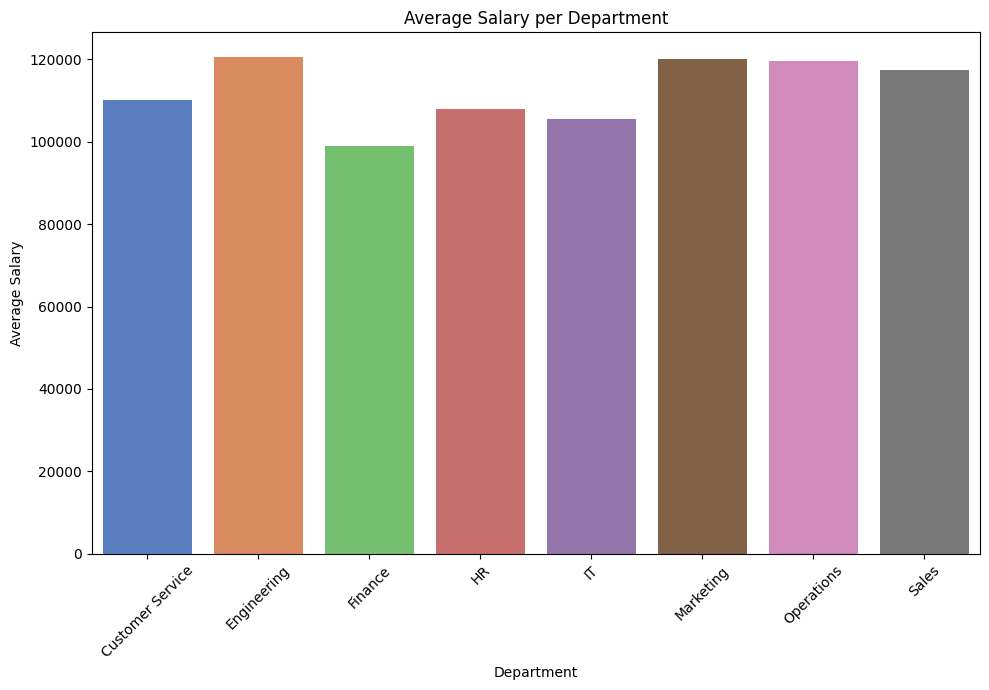

In [330]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.barplot(data=df_statistics, x='Department', y='Average Salary', palette='muted')
plt.title('Average Salary per Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [331]:
from datetime import datetime

df_clean['Date Joined'] = pd.to_datetime(df_clean['Date Joined'])
df_clean['Date Resigned'] = pd.to_datetime(df_clean['Date Resigned'])

df_clean['Years of service'] = ((df_clean['Date Resigned'] - df_clean['Date Joined']).dt.days / 365).round(1)

display(df_clean)

,Employee ID,First Name,Last Name,Age,Gender,DOB,Date Joined,Date Resigned,Department,Salary,Performance level,Years of service
0,1,Cynthia,Gomez,48,Female,2010-05-08,2021-12-15,2024-05-21,Operations,184016,1,2.4
1,2,Ryan,Blair,43,Male,1908-02-07,2024-07-14,2028-06-26,Sales,101159,4,4.0
3,4,Donald,Salinas,52,Female,2016-12-12,2023-10-30,2026-10-20,Sales,90758,3,3.0
4,5,James,Lee,70,Female,2011-08-08,2022-12-21,2025-08-21,IT,193481,3,2.7
7,8,Shawn,Johnston,41,Female,1995-09-25,2021-12-07,2023-02-14,Operations,81011,2,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...
991,992,Henry,Berry,52,Female,1960-08-16,2024-11-07,2027-09-04,IT,42710,2,2.8
993,994,Ralph,Perry,44,Male,1953-01-11,2024-11-10,2024-12-13,Customer Service,158779,1,0.1
994,995,Jim,Mendoza,30,Female,1939-12-20,2023-05-25,2023-10-13,Finance,32691,1,0.4
998,999,Shelby,Mata,19,Male,1985-11-23,2020-08-05,2023-09-24,IT,164747,4,3.1
